In [13]:
#https://anaconda.org/anaconda/sas7bdat
from sas7bdat import SAS7BDAT
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


In [2]:
with SAS7BDAT('crime.sas7bdat') as file:
    df_sas=file.to_data_frame()

[crime.sas7bdat] header length 65536 != 8192


In [7]:
#print(df_sas['Location'])
print(df_sas[['Description','IUCR']])
print(df_sas.columns)

                           Description  IUCR
0                    POSS: BARBITUATES  2021
1                               SIMPLE  0460
2       ARMED:KNIFE/CUTTING INSTRUMENT  0312
3                        HOME INVASION  0650
4                           AUTOMOBILE  0910
...                                ...   ...
105946       AGG CRIMINAL SEXUAL ABUSE  1562
105947       AGG CRIMINAL SEXUAL ABUSE  1562
105948                      TO VEHICLE  1320
105949        FRAUD OR CONFIDENCE GAME  1130
105950                  $500 AND UNDER  0820

[105951 rows x 2 columns]
Index(['date', 'fbi_code', 'arrest_code', 'Arrest', 'Case_Number', 'Block',
       'IUCR', 'Primary_Type', 'Description', 'Location_Description',
       'Domestic', 'Location', 'ID', 'timestamp', 'Beat', 'District', 'Ward',
       'Community_Area', 'X_Coordinate', 'Y_Coordinate', 'Year', 'Updated_On',
       'Latitude', 'Longitude'],
      dtype='object')


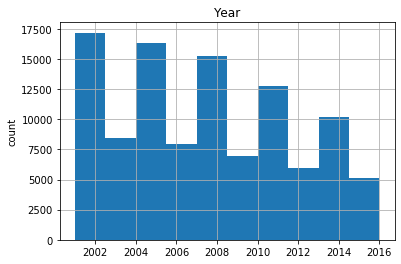

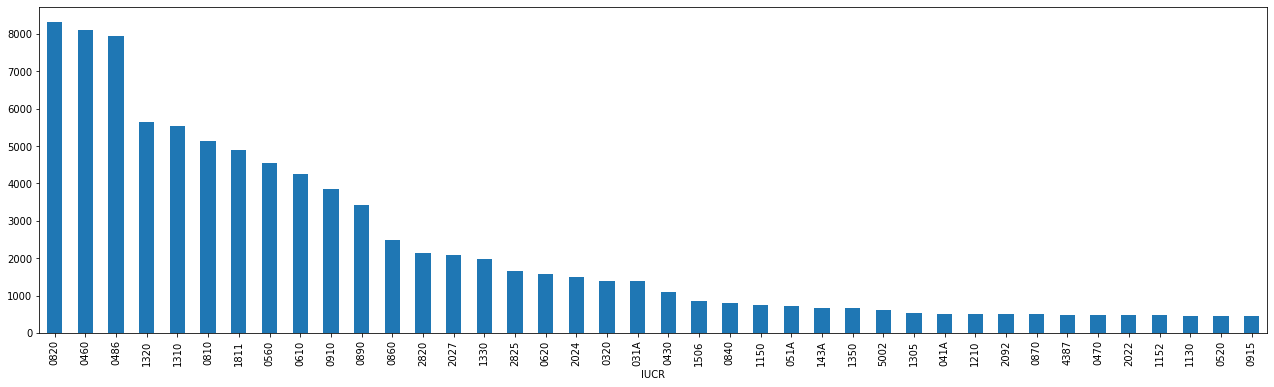

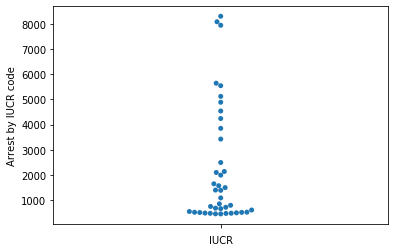

In [61]:
pd.DataFrame.hist(df_sas[['Year']])
plt.ylabel('count')
plt.show()

df_sas['ArrestInt']=df_sas['Arrest'].astype(bool).astype(int)

plt.figure(figsize=(22,6))
iucr=df_sas.groupby(['IUCR'])['ArrestInt'].sum().nlargest(40).sort_values(ascending=False)
iucr.plot.bar()
plt.show()

#print(iucr.index)

_ = sns.swarmplot(y=iucr.values)
_ = plt.xlabel('IUCR')
_ = plt.ylabel('Arrest by IUCR code')

# Show the plot
plt.show()

#print(df_sas.groupby(['District'])['Arrest'].count())

In [98]:
arrest_descriptions=df_sas[df_sas['IUCR'].isin(iucr.index)]['Description'].unique()

arrest_descriptions=np.sort(arrest_descriptions)

result= df_sas[df_sas['Description'].isin(arrest_descriptions)]

result=result.groupby('Description')['ArrestInt'].apply(lambda x: x.sum()).reset_index()

#print(result.head())

print (df_sas['Year'].unique())

for key,item in result.iterrows():
    print(item['Description']," [Occurrences: "+ str(item['ArrestInt'])+']')
    #print(item.Description,item.ArrestInt)

[2016. 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005.
 2004. 2003. 2002. 2001.]
$500 AND UNDER  [Occurrences: 8312]
AGGRAVATED: HANDGUN  [Occurrences: 1241]
AGGRAVATED: OTHER DANG WEAPON  [Occurrences: 1461]
AGGRAVATED:KNIFE/CUTTING INSTR  [Occurrences: 882]
ARMED: HANDGUN  [Occurrences: 1384]
AUTOMOBILE  [Occurrences: 3851]
CREDIT CARD FRAUD  [Occurrences: 743]
CRIMINAL DEFACEMENT  [Occurrences: 542]
DOMESTIC BATTERY SIMPLE  [Occurrences: 7953]
FINANCIAL ID THEFT: OVER $300  [Occurrences: 789]
FORCIBLE ENTRY  [Occurrences: 4242]
FRAUD OR CONFIDENCE GAME  [Occurrences: 465]
FROM BUILDING  [Occurrences: 3424]
HARASSMENT BY TELEPHONE  [Occurrences: 1644]
ILLEGAL USE CASH CARD  [Occurrences: 469]
OTHER VEHICLE OFFENSE  [Occurrences: 602]
OVER $500  [Occurrences: 5123]
POCKET-PICKING  [Occurrences: 502]
POSS: CANNABIS 30GMS OR LESS  [Occurrences: 4889]
POSS: COCAINE  [Occurrences: 473]
POSS: CRACK  [Occurrences: 2095]
POSS: HEROIN(WHITE)  [Occurrences: 1493]
RECKLESS CON